# 1. Import Libraries

### Import all basic libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Dataset

### Load the dataset

In [61]:
df = pd.read_csv('patient_adherence_dataset.csv')

### Display first few rows

In [62]:
df.head()

,Age,Gender,Medication_Type,Dosage_mg,Previous_Adherence,Education_Level,Income,Social_Support_Level,Condition_Severity,Comorbidities_Count,Healthcare_Access,Mental_Health_Status,Insurance_Coverage,Adherence
0,57,Male,TypeA,136,1,High School,634934,Medium,Severe,3,Poor,Good,1,1
1,47,Male,TypeA,134,1,High School,297954,High,Moderate,3,Good,Good,1,0
2,59,Male,TypeC,89,1,High School,789337,High,Moderate,1,Good,Good,1,1
3,72,Male,TypeB,240,0,Postgraduate,267352,Low,Mild,2,Poor,Moderate,1,0
4,46,Male,TypeA,241,1,Postgraduate,718447,Medium,Mild,1,Poor,Good,1,0


## Check the shape of the dataset

In [63]:
df.shape

(5000, 14)

# 3. Exploratory Data Analysis (EDA)

### Display all column names

In [64]:
df.columns

Index(['Age', 'Gender', 'Medication_Type', 'Dosage_mg', 'Previous_Adherence',
       'Education_Level', 'Income', 'Social_Support_Level',
       'Condition_Severity', 'Comorbidities_Count', 'Healthcare_Access',
       'Mental_Health_Status', 'Insurance_Coverage', 'Adherence'],
      dtype='object')

### Check datatypes of each column

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   5000 non-null   int64 
 1   Gender                5000 non-null   object
 2   Medication_Type       5000 non-null   object
 3   Dosage_mg             5000 non-null   int64 
 4   Previous_Adherence    5000 non-null   int64 
 5   Education_Level       5000 non-null   object
 6   Income                5000 non-null   int64 
 7   Social_Support_Level  5000 non-null   object
 8   Condition_Severity    5000 non-null   object
 9   Comorbidities_Count   5000 non-null   int64 
 10  Healthcare_Access     5000 non-null   object
 11  Mental_Health_Status  5000 non-null   object
 12  Insurance_Coverage    5000 non-null   int64 
 13  Adherence             5000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 547.0+ KB


In [66]:
df.dtypes

,0
Age,int64
Gender,object
Medication_Type,object
Dosage_mg,int64
Previous_Adherence,int64
Education_Level,object
Income,int64
Social_Support_Level,object
Condition_Severity,object
Comorbidities_Count,int64


In [67]:
df.describe()

,Age,Dosage_mg,Previous_Adherence,Income,Comorbidities_Count,Insurance_Coverage,Adherence
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000
mean,49.665600,200.893000,0.702400,5.009179e+05,2.01480,0.800800,0.457200
std,14.641689,50.556819,0.457248,1.968861e+05,1.40149,0.399439,0.498215
min,18.000000,50.000000,0.000000,1.000000e+05,0.00000,0.000000,0.000000
25%,40.000000,166.000000,0.000000,3.607158e+05,1.00000,1.000000,0.000000
50%,50.000000,201.000000,1.000000,5.010565e+05,2.00000,1.000000,0.000000
75%,59.000000,235.000000,1.000000,6.381558e+05,3.00000,1.000000,1.000000
max,90.000000,423.000000,1.000000,1.238324e+06,9.00000,1.000000,1.000000


### Check the sum of all missing values

In [68]:
df.isnull().sum()

,0
Age,0
Gender,0
Medication_Type,0
Dosage_mg,0
Previous_Adherence,0
Education_Level,0
Income,0
Social_Support_Level,0
Condition_Severity,0
Comorbidities_Count,0


### Find if there are any duplicated rows

In [69]:
df.duplicated().sum()

np.int64(0)

# 4. Data Visualization

## Create a Heatmap for the dataset

<Axes: >

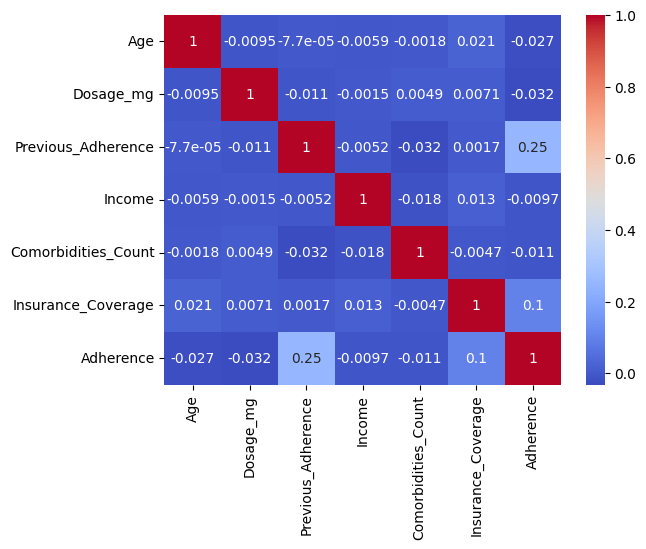

In [70]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")

## Plot pairplot of numerical features

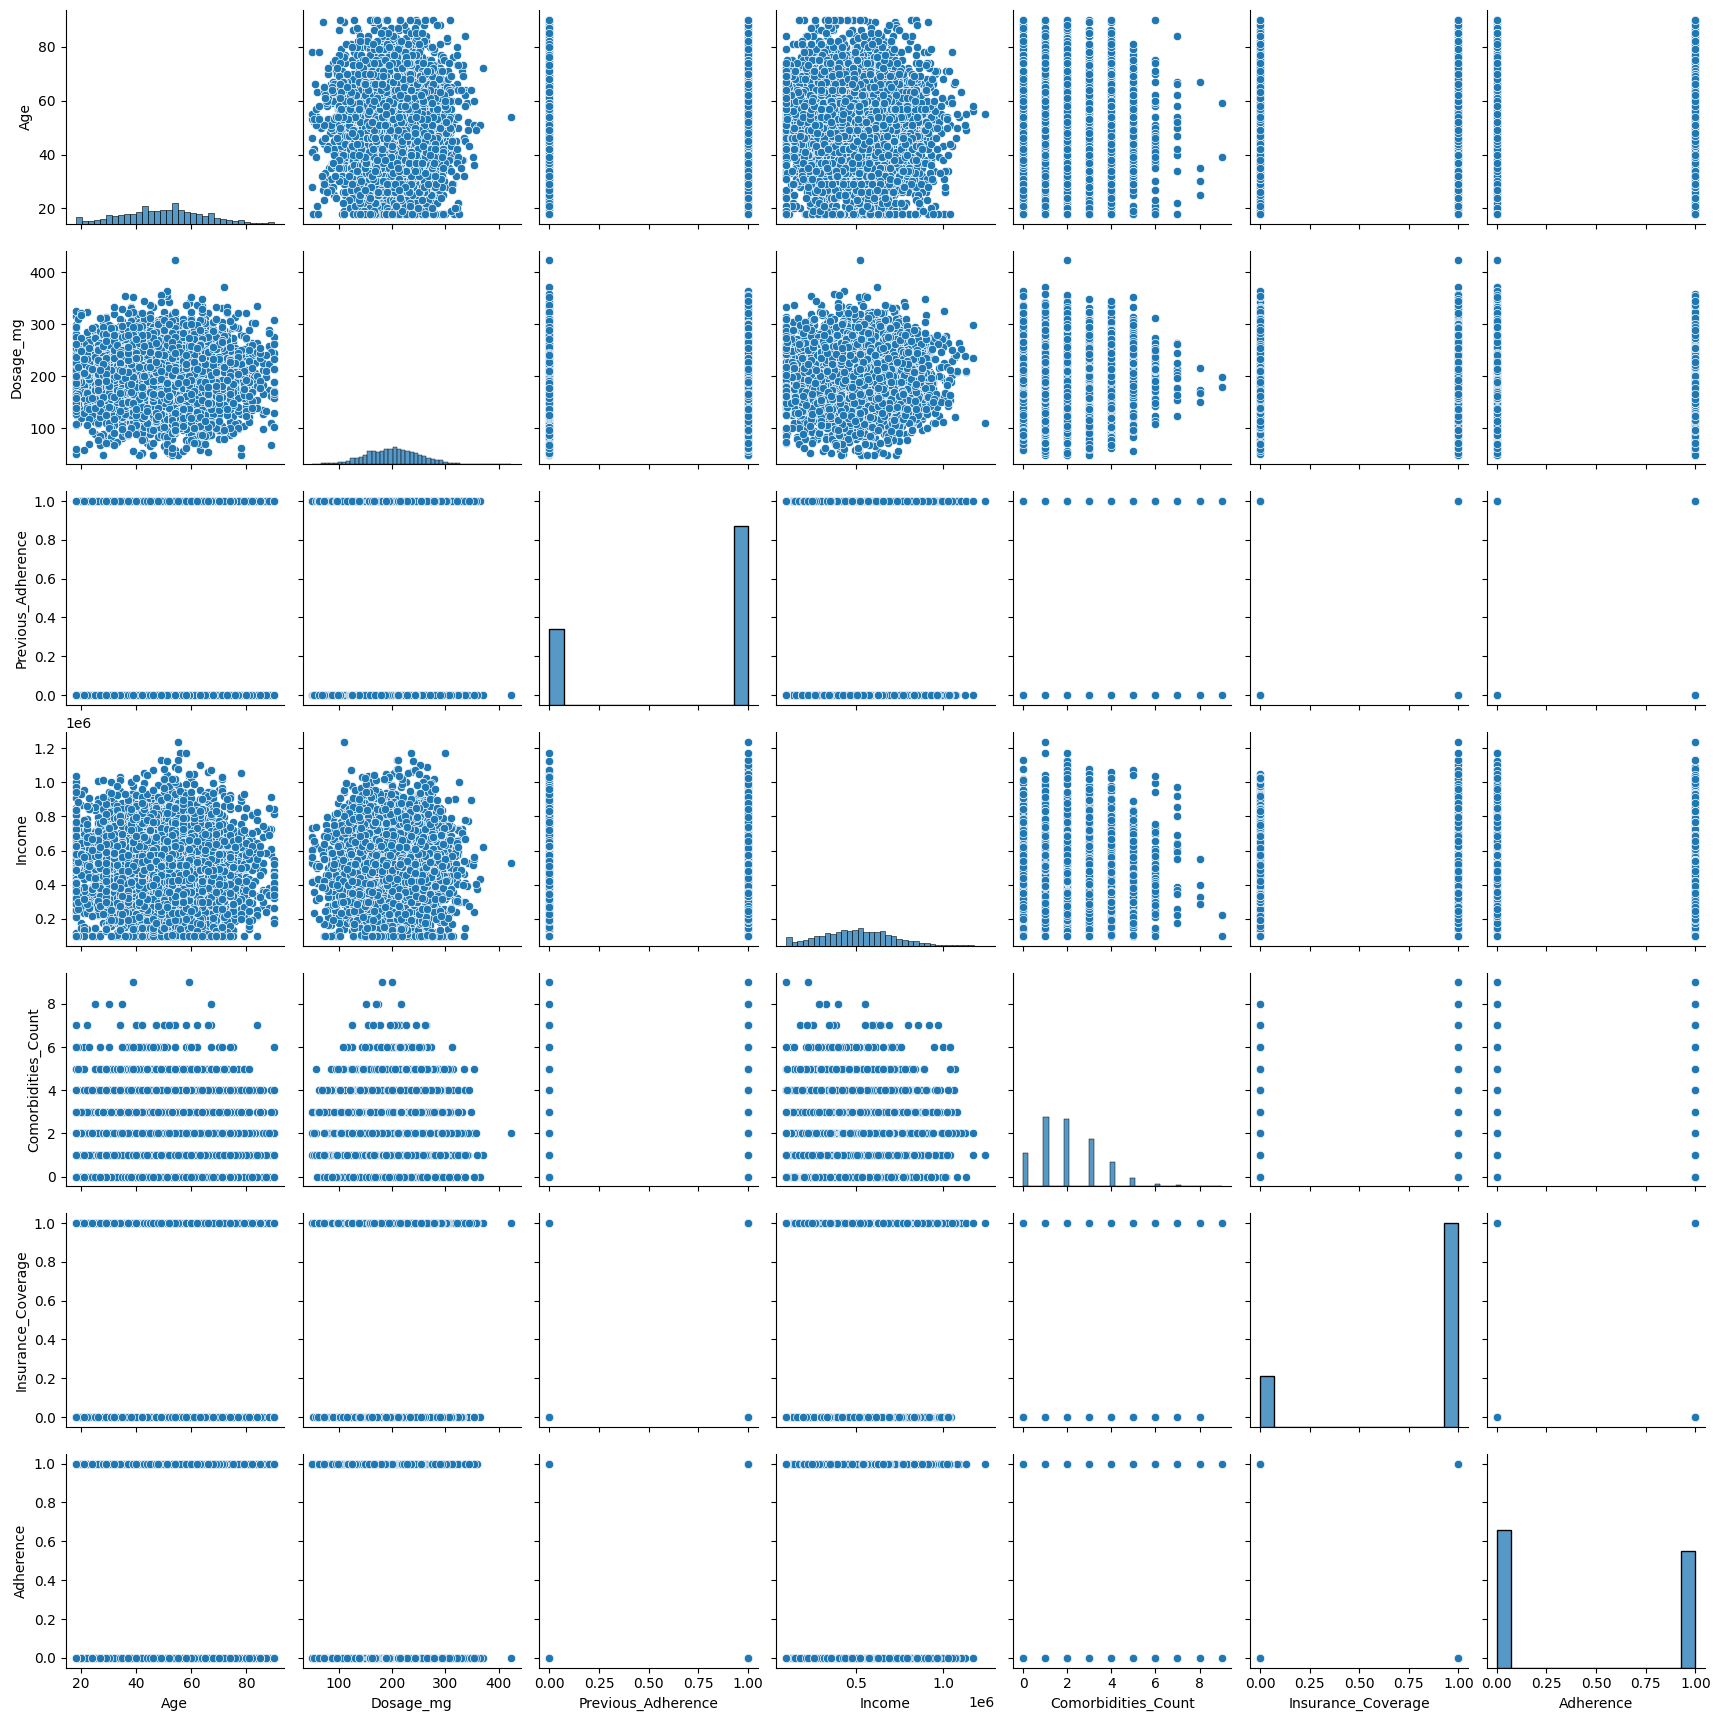

In [71]:
sns.pairplot(df.select_dtypes(include=np.number))

# 5. Feature Selection

### Select the features (X) and target (y) for the model

In [72]:
X = df.drop('Adherence',axis = 1)
y = df['Adherence']

### Import the Library for Label Encoding from sklearn.preprocessing

In [73]:
from sklearn.preprocessing import LabelEncoder

### Apply Label Encoding (Using Loop for All Categorical Columns)

In [74]:
le =  LabelEncoder()

In [75]:
for col in X.select_dtypes(include="object").columns:
  X[col] = le.fit_transform(X[col])

# 6. Test Train Split

### Import the Library for Train-Test Splitting from sklearn.model_selection

In [76]:
from sklearn.model_selection import train_test_split

### Split the dataset into training and testing sets

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Data Preprocessing

### Import the Library for StandardScaler from sklearn.preprocessing

In [78]:
from sklearn.preprocessing import StandardScaler

### Apply StandardScaler on the feature set

In [79]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

# 8. Logistic Regression Model

### Import the Library for Logistic Regression from sklearn.linear_model

In [80]:
from sklearn.linear_model import LogisticRegression

### Train the Logistic Regression model

In [81]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Predict the values using the trained model

In [82]:
y_pred = model.predict(X_test)

# 9. Model Evaluation

### Import the Libraries for Evaluating the model(Accuracy_score , confusion_martrix , classification report)



Import the Libraries for Model Evaluation from sklearn.metrics

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Calculate the accuracy score of the model

In [85]:
acc = accuracy_score(y_test,y_pred)
acc

0.629

### Display confusion matrix

In [86]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[361, 165],
       [206, 268]])

### Display the classification report

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       526
           1       0.62      0.57      0.59       474

    accuracy                           0.63      1000
   macro avg       0.63      0.63      0.63      1000
weighted avg       0.63      0.63      0.63      1000

